In [1]:
%config InlineBackend.figure_format = "retina"

from matplotlib import pyplot as plt
import numpy as np

from spamm.run_spamm import spamm
from astropy.modeling.powerlaws import PowerLaw1D
from spamm.analysis import plot_best_models
from spamm.Samples import Samples

In [2]:
# Define the unit-less wavelength and flux
wave = np.arange(1000., 4000.)

# Just generate a simple sample power law for a spectrum
pl = PowerLaw1D(amplitude=1.5e-17, x_0=2500, alpha=2.0)
flux = pl(wave)

# Make the error 5% of the flux array 
flux_err = flux * 0.05

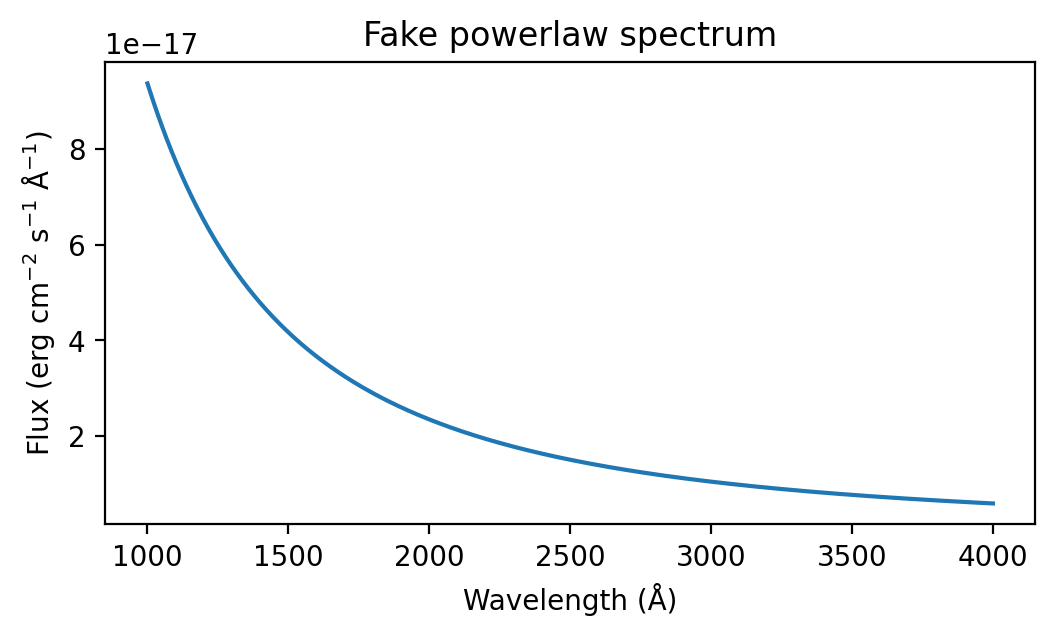

In [3]:
fig = plt.figure(figsize=(6,3))
plt.plot(wave, flux)
plt.title("Fake powerlaw spectrum")
plt.xlabel("Wavelength (Å)")
plt.ylabel(r"Flux (erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)");

In [4]:
# Run spamm
spamm_out = spamm(complist=['PL'], inspectrum=(wave, flux, flux_err),
                  n_walkers=32, n_iterations=100, parallel=False,
                  outdir="powerlaw_example", picklefile="powerlaw")

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 131.02it/s]


[SPAMM]: Mean acceptance fraction: 0.478
[SPAMM]: Saved pickle file: powerlaw_example/powerlaw.pickle.gz
[SPAMM]: Saved powerlaw_triangle.png
[SPAMM]: Saved powerlaw_chain.png
[SPAMM]: Saved powerlaw_posterior.png
[SPAMM]: Execution time: 1.161 seconds


In [5]:
S = Samples("powerlaw_example/powerlaw.pickle.gz", outdir='powerlaw_example', burn=50)
plot_best_models(S)

[SPAMM]: Saved powerlaw_bestfits.png
